In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from warnings import filterwarnings
filterwarnings("ignore")
import os

# LOADING DATASETS

In [25]:
df_inf=pd.read_csv(r'C:\Users\dell\Downloads\PCOS_infertility.csv', encoding='iso-8859-1')
df_noinf=pd.read_csv(r'C:\Users\dell\Downloads\data without infertility _final.csv', encoding='iso-8859-1')
print(f"Shape of df_inf:{df_inf.shape}")
print(f"Shape of df_noinf:{df_noinf.shape}")

Shape of df_inf:(541, 6)
Shape of df_noinf:(541, 43)


In [7]:
df_inf.sample(5)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
405,406,10406,0,465.01,465.01,4.2
437,438,10438,1,4.20,4.20,8
47,48,10048,0,1500.00,528.50,4.33
394,395,10395,0,347.98,1.99,5.8
16,17,10017,0,8104.21,91.55,3.78


In [8]:
df_noinf.sample(5)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
253,254,10254,0,36,46.0,150.0,20.444444,15,72,18,...,0.0,0,110,80,1,3,18.0,14.0,6.0,NaN
232,233,10233,1,35,55.0,162.0,20.957171,13,72,18,...,1.0,0,120,80,16,14,15.0,18.0,11.5,NaN
421,422,10422,0,40,74.1,164.0,27.600000,15,78,20,...,1.0,1,120,80,2,4,10.0,16.0,7.2,NaN
497,498,10498,0,35,54.0,140.0,27.600000,11,72,20,...,0.0,0,110,70,9,7,20.0,16.0,6.6,NaN
229,230,10230,0,28,74.3,154.0,31.329061,13,72,18,...,1.0,0,110,80,6,5,14.0,13.0,8.5,NaN


# Feature Selection

In [9]:
#Identifying Features which have more than 0.40 correlation with PCOS(Y/N)

corr_features=df_noinf.corrwith(df_noinf["PCOS (Y/N)"]).abs().sort_values(ascending=False)
#features with correlation more than 0.4
corr_features=corr_features[corr_features>0.4].index
corr_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')

In [10]:
df_inf.corrwith(df_inf["PCOS (Y/N)"]).abs()

Sl. No                    0.060998
Patient File No.          0.060998
PCOS (Y/N)                1.000000
  I   beta-HCG(mIU/mL)    0.027617
II    beta-HCG(mIU/mL)    0.012757
dtype: float64

In [11]:
df_noinf=df_noinf[corr_features]
df_noinf.head()

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I)
0,0,3,3,0,0,0,2
1,0,5,3,0,0,0,2
2,1,15,13,0,0,0,2
3,0,2,2,0,0,0,2
4,0,4,3,0,0,0,2


# EDA

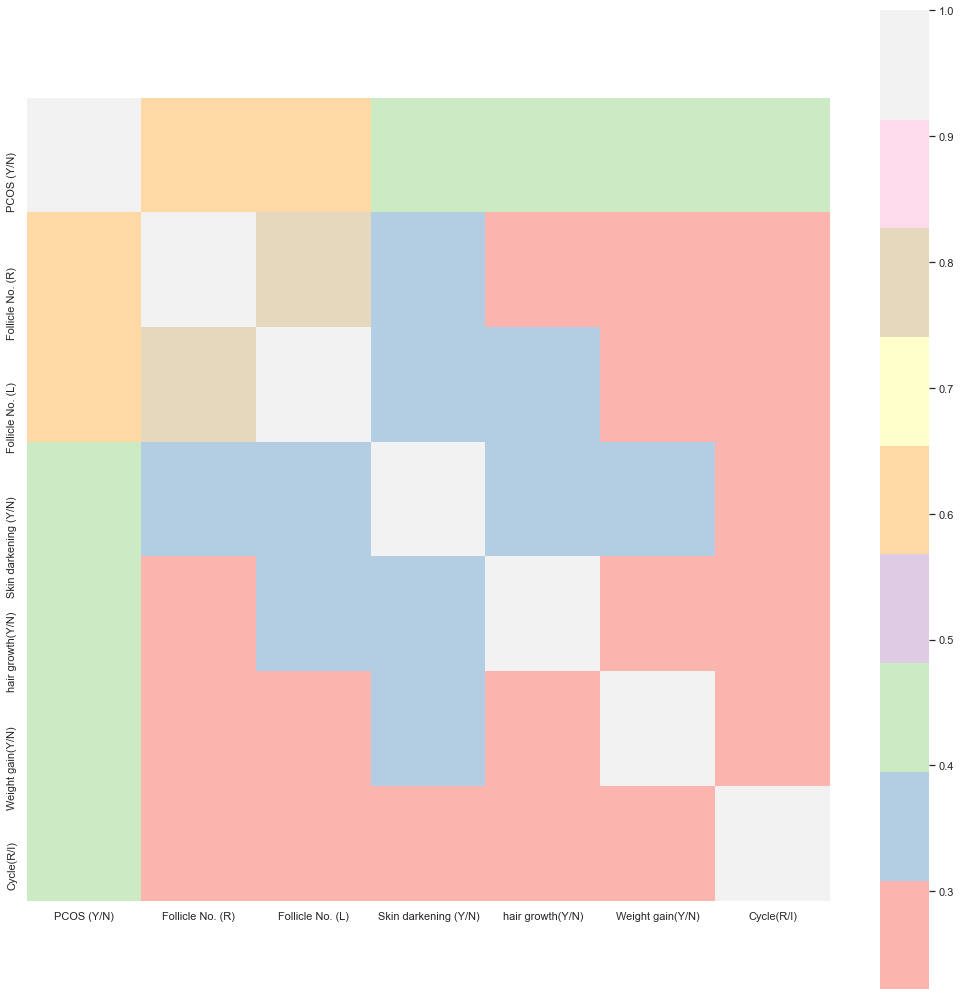

In [20]:
#Examaning a correlation matrix of all the features

corrmat = df_noinf.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

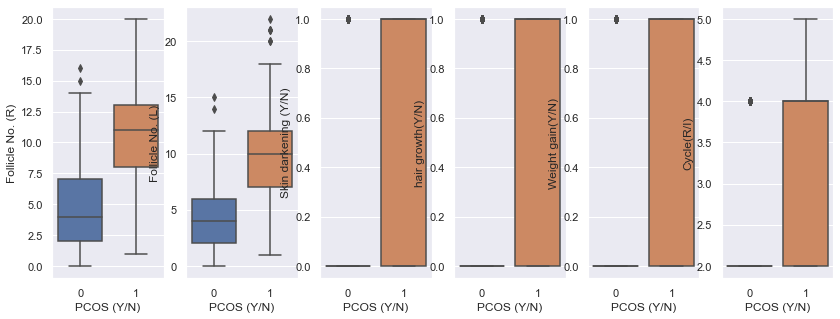

In [13]:
plt.figure(figsize=(14,5))
plt.subplot(1,6,1)
sns.boxplot(x='PCOS (Y/N)',y='Follicle No. (R)',data=df_noinf)
#plt.subplot(1,7,2)
#sns.boxplot(x='PCOS (Y/N)',y='Insulin levels (æIU/ml)',data=df_noinf)
plt.subplot(1,6,2)
sns.boxplot(x='PCOS (Y/N)',y='Follicle No. (L)',data=df_noinf)
plt.subplot(1,6,3)
sns.boxplot(x='PCOS (Y/N)',y='Skin darkening (Y/N)',data=df_noinf)
plt.subplot(1,6,4)
sns.boxplot(x='PCOS (Y/N)',y='hair growth(Y/N)',data=df_noinf)
plt.subplot(1,6,5)
sns.boxplot(x='PCOS (Y/N)',y='Weight gain(Y/N)',data=df_noinf)
plt.subplot(1,6,6)
sns.boxplot(x='PCOS (Y/N)',y='Cycle(R/I)',data=df_noinf)

plt.show()


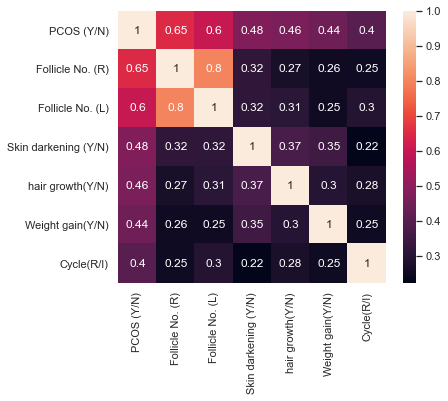

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(df_noinf.corr(), annot=True)
plt.show()

In [15]:
y=df_noinf['PCOS (Y/N)']
X=df_noinf.drop(['PCOS (Y/N)'], axis=1)

In [16]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.2)

# Training Model

In [17]:
model=LogisticRegression()
model.fit(X_train,y_train)
print(f"Score in Train Data : {model.score(X_train,y_train)}")

Score in Train Data : 0.9027777777777778


# Prediction

In [18]:
y_pred=model.predict(X_test)

# Model Evalution

In [19]:
print(f"Score in Test Data : {model.score(X_test,y_test)}")

cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
cm

Score in Test Data : 0.9174311926605505
Right classification : 100
Wrong classification : 9


array([[64,  5],
       [ 4, 36]], dtype=int64)